In [1]:
import pandas as pd
import numpy as np
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

# Initialize Model Parameters

#-- Pallet Dimensions: 80 x 120 cm european
bx = 5 # Buffer x
by = 5 # Buffer y
pal_812 = [80 + bx, 120 + by]
#-- Pallet Dimensions: 100 x 120 cm american
bx = 5 # Buffer x
by = 5 # Buffer y
pal_1012 = [100 + bx, 120 + by]

# Container size inner in centimetres
bins20 = [(235, 590)] # 20' Container
bins40 = [(235, 1203)] # 40' Container


In [9]:
def solver(n_812, n_1012, bins):
    # Pallets to load
    rectangles = [pal_812 for i in range(n_812)] + [pal_1012 for i in range(n_1012)]
    
    # Build the Packer
    pack = newPacker()

    # Add the rectangles to packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # Add the bins where the rectangles will be placed
    for b in bins:
        pack.add_bin(*b)

    # Start packing
    pack.pack()
    
    # Full rectangle list with coordinates
    all_rects = pack.rect_list()

    # Pallets with dimensions
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]

    # Count number of 80 x 120 / of 100 x 120
    p_812, p_1012 = all_pals.count(pal_812), all_pals.count(pal_1012)
    print("{:,}/{:,} Pallets 80 x 120 (cm) | {:,}/{:,} Pallets 100 x 120 (cm)".format(p_812, n_812, p_1012, n_1012))
    
    return all_rects, all_pals

In [3]:
def plot_solution(all_rects, pal_812, pal_1012):
    # Plot
    plt.figure(figsize=(10,10))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        # Pallet type
        if [w, h] == pal_812:
            color = '--k'
        else:
            color = '--r'

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5], color)
    
    plt.show()

0/23 Pallets 80 x 120 (cm) | 9/23 Pallets 100 x 120 (cm)


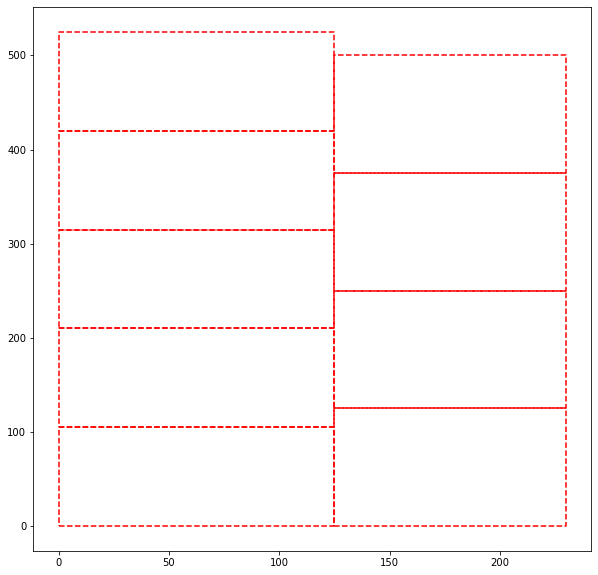

TypeError: 'module' object is not iterable

In [8]:
# Test 1
n_812 = 23
n_1012 = 23
all_rects, all_pals = solver(n_812, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1012)
for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)